# Advanced Tasks (Week 3) – Statistics, ML Models, and Evaluation

1. Statistics for Data Science

In [2]:
# Load and Explore the Dataset
import pandas as pd
import numpy as np

# Load from a direct URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head(5)  


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Mean, Median, Mode, Std Deviation for all numeric columns
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]
std_dev_values = df.std(numeric_only=True)

summary_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values,
    "Std Dev": std_dev_values
})

summary_stats.round(2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram 
sns.histplot(df['medv'], kde=True, color='skyblue')
plt.title('Distribution of Median House Value (medv)')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.show()

# Central Limit Theorem: Sample means distribution
sample_means = [df['medv'].sample(50).mean() for _ in range(1000)]

sns.histplot(sample_means, kde=True, color='lightgreen')
plt.title('CLT: Sampling Distribution of Sample Means (medv)')
plt.xlabel('Sample Mean of medv')
plt.ylabel('Frequency')
plt.show()


In [8]:
# T-test — Do houses near Charles River (chas=1) have different average price?
from scipy.stats import ttest_ind

# Split groups
river = df[df['chas'] == 1]['medv']
non_river = df[df['chas'] == 0]['medv']

# Perform independent t-test
t_stat, p_val = ttest_ind(river, non_river)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

T-statistic: 3.996, P-value: 0.0001


In [9]:
# Chi-Square Test — Association between chas (river) and rad (access to highways)
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['chas'], df['rad'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p:.4f}")

Chi2 Statistic: 13.90, P-value: 0.0845


2. Introduction to Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Define Features (X) and Target (y)

# Separate features and target
X = df.drop("medv", axis=1)
y = df["medv"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


In [17]:
# Predictions
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)

# RMSE & R²
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

print(f"Linear Regression - RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")
print(f"KNN Regressor     - RMSE: {knn_rmse:.2f}, R²: {knn_r2:.2f}")

Linear Regression - RMSE: 4.14, R²: 0.77
KNN Regressor     - RMSE: 5.09, R²: 0.65


In [18]:
# Convert regression to binary classification problem
y_binary = (y >= 25).astype(int)

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall:", recall_score(y_test_c, y_pred_c))
print("F1 Score:", f1_score(y_test_c, y_pred_c))


Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.8636363636363636
F1 Score: 0.926829268292683


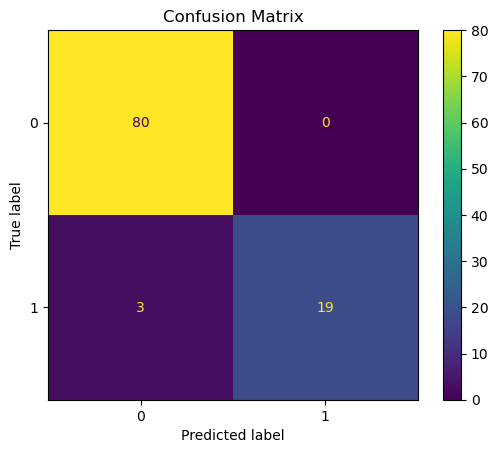

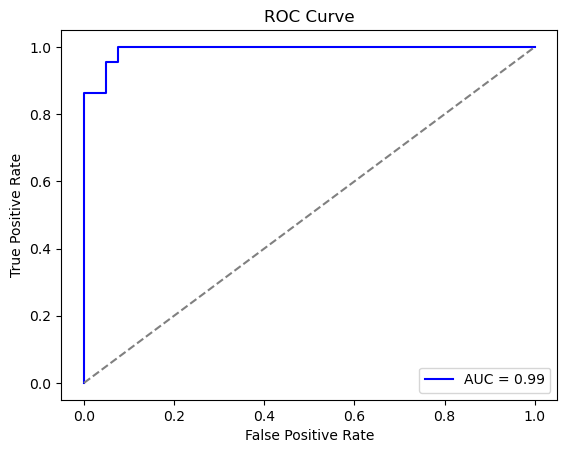

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test_c)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_c, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()